# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re #regular expression
import string
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams    #for ngram implementation
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob #for sentimental analysis
from collections import  Counter




# Upload csv file and create dataframe

In [2]:
train_df=pd.read_csv("train.csv")
train_df

,ID,Review,Rating
0,0,exceptional service nice all-around daughter s...,5
1,1,beautiful relaxing jw marriott desert ridge re...,5
2,2,great location great location 5 mins subway ta...,5
3,3,"pleased nice safe hotel, flower market hotel v...",3
4,4,excellent hotel service great hotel excellent ...,4
...,...,...,...
14338,14338,"hotel madrid hotel perfect, location tiny quie...",5
14339,14339,excellent hotel stay florence hotel chosen tri...,5
14340,14340,great place relax know looking vacation book t...,4
14341,14341,"better just got week seattle loved minute, pac...",3


In [3]:
#upload test data
test_df=pd.read_csv("test.csv")
test_df.head()

,ID,Review
0,0,just superb rendezvous just perfect property s...
1,1,"better close staten island ferry easy subway, ..."
2,2,"enjoyed stay, just come long weekend barcelona..."
3,3,"muse great, muse hotel great, did n't hear noi..."
4,4,"conveniently located morning flight, family st..."


In [4]:
#check the count of number of rows and columns
train_df.shape

(14343, 3)

In [5]:
#check the count of number of rows and columns of test data
test_df.shape

(6148, 2)

in  this training data set we have 14343 rows and 3 columns

In [6]:
#check the information present in the train_df
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14343 entries, 0 to 14342
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      14343 non-null  int64 
 1   Review  14343 non-null  object
 2   Rating  14343 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 336.3+ KB


In [7]:
#check whether the the data set contains null values
train_df.isnull().sum()

ID        0
Review    0
Rating    0
dtype: int64

In [9]:
#check whether the the test data set contains null values
train_df.isnull().sum()

ID        0
Review    0
Rating    0
dtype: int64

# Clean the Review data

In [3]:
#convert text into lower case letters,remove special characters,symbols
def clean_data(text):
    
    data=text.lower()
    data=re.sub('[^a-zA-Z]',' ',data)
    data = re.sub(r"(http|https|pic.)\S+"," ",data)
    data = re.sub("-" ," ",data) 
    data = re.sub('\[.*?\]', '', data)
    data = re.sub('[%s]' % re.escape(string.punctuation), '', data)
    data = re.sub('\w*\d\w*', '', data)
    data = re.sub("\n" ," ",data)
    # Contractions
    data = re.sub(r"he's", "he is", data)
    data = re.sub(r"there's", "there is", data)
    data = re.sub(r"We're", "We are", data)
    data = re.sub(r"That's", "That is", data)
    data = re.sub(r"won't", "will not", data)
    data = re.sub(r"they're", "they are", data)
    data = re.sub(r"Can't", "Cannot", data)
    data = re.sub(r"wasn't", "was not", data)
    data = re.sub(r"don\x89Ûªt", "do not", data)
    data = re.sub(r"aren't", "are not", data)
    data = re.sub(r"isn't", "is not", data)
    data = re.sub(r"What's", "What is", data)
    data = re.sub(r"haven't", "have not", data)
    data = re.sub(r"hasn't", "has not", data)
    data = re.sub(r"There's", "There is", data)
    data = re.sub(r"He's", "He is", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"You're", "You are", data)
    data = re.sub(r"I'M", "I am", data)
    data = re.sub(r"shouldn't", "should not", data)
    data = re.sub(r"wouldn't", "would not", data)
    data = re.sub(r"i'm", "I am", data)
    data = re.sub(r"I\x89Ûªm", "I am", data)
    data = re.sub(r"I'm", "I am", data)
    data = re.sub(r"Isn't", "is not", data)
    data = re.sub(r"Here's", "Here is", data)
    data = re.sub(r"you've", "you have", data)
    data = re.sub(r"you\x89Ûªve", "you have", data)
    data = re.sub(r"we're", "we are", data)
    data = re.sub(r"what's", "what is", data)
    data = re.sub(r"couldn't", "could not", data)
    data = re.sub(r"we've", "we have", data)
    data = re.sub(r"it\x89Ûªs", "it is", data)
    data = re.sub(r"doesn\x89Ûªt", "does not", data)
    data = re.sub(r"It\x89Ûªs", "It is", data)
    data = re.sub(r"Here\x89Ûªs", "Here is", data)
    data = re.sub(r"who's", "who is", data)
    data = re.sub(r"I\x89Ûªve", "I have", data)
    data = re.sub(r"y'all", "you all", data)
    data = re.sub(r"can\x89Ûªt", "cannot", data)
    data = re.sub(r"would've", "would have", data)
    data = re.sub(r"it'll", "it will", data)
    data = re.sub(r"we'll", "we will", data)
    data = re.sub(r"wouldn\x89Ûªt", "would not", data)
    data = re.sub(r"We've", "We have", data)
    data = re.sub(r"he'll", "he will", data)
    data = re.sub(r"Y'all", "You all", data)
    data = re.sub(r"Weren't", "Were not", data)
    data = re.sub(r"Didn't", "Did not", data)
    data = re.sub(r"they'll", "they will", data)
    data = re.sub(r"they'd", "they would", data)
    data = re.sub(r"DON'T", "DO NOT", data)
    data = re.sub(r"That\x89Ûªs", "That is", data)
    data = re.sub(r"they've", "they have", data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"should've", "should have", data)
    data = re.sub(r"You\x89Ûªre", "You are", data)
    data = re.sub(r"where's", "where is", data)
    data = re.sub(r"Don\x89Ûªt", "Do not", data)
    data = re.sub(r"we'd", "we would", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"weren't", "were not", data)
    data = re.sub(r"They're", "They are", data)
    data = re.sub(r"Can\x89Ûªt", "Cannot", data)
    data = re.sub(r"you\x89Ûªll", "you will", data)
    data = re.sub(r"I\x89Ûªd", "I would", data)
    data = re.sub(r"let's", "let us", data)
    data = re.sub(r"it's", "it is", data)
    data = re.sub(r"can't", "cannot", data)
    data = re.sub(r"don't", "do not", data)
    data = re.sub(r"you're", "you are", data)
    data = re.sub(r"i've", "I have", data)
    data = re.sub(r"that's", "that is", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"doesn't", "does not", data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"didn't", "did not", data)
    data = re.sub(r"ain't", "am not", data)
    data = re.sub(r"you'll", "you will", data)
    data = re.sub(r"I've", "I have", data)
    data = re.sub(r"Don't", "do not", data)
    data = re.sub(r"I'll", "I will", data)
    data = re.sub(r"I'd", "I would", data)
    data = re.sub(r"Let's", "Let us", data)
    data = re.sub(r"you'd", "You would", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"Ain't", "am not", data)
    data = re.sub(r"Haven't", "Have not", data)
    data = re.sub(r"Could've", "Could have", data)
    data = re.sub(r"youve", "you have", data)  
    data = re.sub(r"donå«t", "do not", data)
    
    return data

In [4]:
train_df["Review"]=train_df["Review"].apply(clean_data)

In [8]:
test_df["Review"]=test_df["Review"].apply(clean_data)

In [11]:
train_df["Review"][10]

'great time booked trip breezes apple vacations highly recommend arrived hotel early not check   knew flew bathing suits  got staff wonderfull took luggage greeted drinks friendly staff  headed straight beautiful beach seen  water  perfect blue miguel apple host awesome  food good  wouldnt eat cow  safari great dad loved golf  husband little dissapointed deep sea fishing didnt catch nor did change bait day  rooms nice reading reviews like alot people little nervous great time definatley   '

In [12]:
#lammatization of stemming is it produce intermediate representation of words, that may not have any meaning 
#eg: intelligen..so here I am using lammetization


In [5]:
stop_words = stopwords.words('english')
stop_words.extend(['great', 'time', 'stay', 'stayed', 'euro','lot','punta', 'cana','san', 'juan'])

In [9]:
with open("stop.txt","r") as sw:
    stopword = sw.read()

In [10]:
stopwords = stopword.split("\n")
stp_wrds = stopwords+stop_words

In [155]:
#pickle stopwords
with open("stp_wrds.pkl", "wb") as picklefile:
       pickle.dump(stp_wrds, picklefile)


In [157]:
with open("stp_wrds.pkl", "rb") as picklefile:
         stop = pickle.load(picklefile)

In [10]:
#pickle stopwords

stop= pd.read_pickle('stp_wrds.pkl')
stop

['a',
 "a's",
 'able',
 'about',
 'above',
 'according',
 'accordingly',
 'across',
 'actually',
 'after',
 'afterwards',
 'again',
 'against',
 "ain't",
 'all',
 'allow',
 'allows',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'an',
 'and',
 'another',
 'any',
 'anybody',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anyways',
 'anywhere',
 'apart',
 'appear',
 'appreciate',
 'appropriate',
 'are',
 "aren't",
 'around',
 'as',
 'aside',
 'ask',
 'asking',
 'associated',
 'at',
 'available',
 'away',
 'awfully',
 'b',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'believe',
 'below',
 'beside',
 'besides',
 'best',
 'better',
 'between',
 'beyond',
 'both',
 'brief',
 'but',
 'by',
 'c',
 "c'mon",
 "c's",
 'came',
 'can',
 "can't",
 'cannot',
 'cant',
 'cause',
 'causes',
 'certain',
 'certainly',
 'changes',
 'clearly',
 'co',
 'com',
 'come',
 'c

In [19]:
#peform lammatization and  remove stopwords from data set
lemmatizer=WordNetLemmatizer()
def remove_stopwords(text):
    words=nltk.word_tokenize(text)
    words=[lemmatizer.lemmatize(word) for word in words if word not in  stop]
    words=' '.join(words)
    return words

In [20]:
train_df["Review"]=train_df["Review"].apply(remove_stopwords)


In [20]:
test_df["Review"]=test_df["Review"].apply(clean_data)

In [13]:
train_data=train_df
train_data.head(3)

,ID,Review,Rating
0,0,exceptional service nice daughter priced king ...,5
1,1,beautiful relaxing jw marriott desert ridge ou...,5
2,2,location location min subway take blommingdale...,5


In [22]:
train_data["Review"][10]

'booked trip breeze apple vacation highly recommend arrived early check knew flew bathing suit staff wonderfull luggage greeted drink friendly staff headed straight beautiful beach water perfect blue miguel apple host awesome food wouldnt eat cow safari dad loved golf husband dissapointed deep sea fishing didnt catch change bait room nice reading review alot people nervous definatley'

# create pickle file of  train_data for later use


In [23]:
train_first_data=train_data

In [24]:
with open("train_first_data.pkl", "wb") as picklefile:
       pickle.dump(train_first_data, picklefile)


In [25]:
with open("train_first_data.pkl", "rb") as picklefile:
         df = pickle.load(picklefile)

In [15]:
#use data_pick.pkl for loading train_df data
train_data = pd.read_pickle('train_first_data.pkl')
train_data

,ID,Review,Rating
0,0,exceptional service nice daughter priced king ...,5
1,1,beautiful relaxing jw marriott desert ridge ou...,5
2,2,location location min subway take blommingdale...,5
3,3,pleased nice safe flower market vast array res...,3
4,4,excellent service excellent location couple mi...,4
...,...,...,...
14338,14338,madrid perfect location tiny quiet street cent...,5
14339,14339,excellent florence chosen tripadviser hidden g...,5
14340,14340,place relax vacation book trip paradisus husba...,4
14341,14341,week seattle loved minute pacific plaza buy im...,3


# create pickle file of test_df for later use

In [22]:
test_df.to_pickle("test_df.pkl")

# Total Number of Customers who rated the Hotel as per rating category

In [16]:

train_data.groupby(by='Rating').ID.count()


Rating
1     977
2    1248
3    1510
4    4172
5    6436
Name: ID, dtype: int64

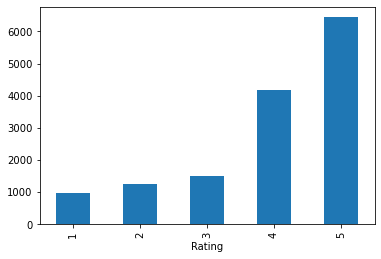

In [17]:
rating_count=train_data.groupby(by='Rating').ID.count()
rating_count.plot.bar()
plt.show()

here we can see that distribution of reviews on the basis of rating. Here most of the travelers  gave five rating. Very few gave one and two rating

In [145]:
# percentage of distribution of rating
rating_percentage=100*train_data["Rating"].value_counts()/len(train_data)
rating_percentage

5    44.872063
4    29.087360
3    10.527784
2     8.701109
1     6.811685
Name: Rating, dtype: float64

<AxesSubplot:title={'center':'percentage of sentiment description'}, ylabel='Rating'>

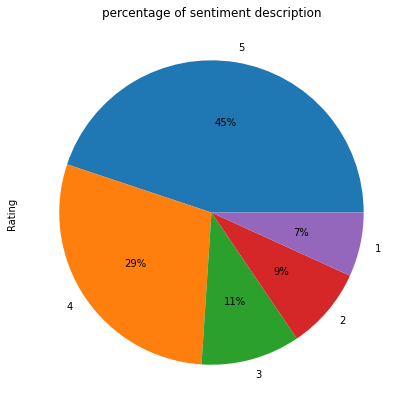

In [146]:
rating_percentage.plot(kind='pie',figsize=(7,7),title='percentage of sentiment description', autopct='%1.0f%%')

Here we can see that most of the reviews has five ratings, very few reviews has one ratings 

# Create word frequency of Reviews

In [18]:
#Create corpus 
corpus=[]
new= train_data['Review'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]



In [19]:
corpus

['exceptional',
 'service',
 'nice',
 'daughter',
 'priced',
 'king',
 'suite',
 'weekend',
 'night',
 'impressed',
 'exceptionally',
 'welcoming',
 'service',
 'reservation',
 'departure',
 'employee',
 'talked',
 'friendly',
 'eager',
 'question',
 'amazed',
 'age',
 'shaped',
 'pool',
 'tiny',
 'looked',
 'fun',
 'kid',
 'hot',
 'tub',
 'exercise',
 'breakfast',
 'abundant',
 'make',
 'waffle',
 'add',
 'scrambled',
 'egg',
 'bacon',
 'sausage',
 'fruit',
 'bagel',
 'muffin',
 'oatmeal',
 'yogurt',
 'wanted',
 'morning',
 'sort',
 'long',
 'line',
 'waiting',
 'make',
 'waffle',
 'waiting',
 'scrambled',
 'egg',
 'nice',
 'asked',
 'freeway',
 'reading',
 'review',
 'earlier',
 'bit',
 'noisy',
 'hey',
 'city',
 'felt',
 'deluxe',
 'reasonable',
 'price',
 'nice',
 'bedding',
 'art',
 'wall',
 'space',
 'needle',
 'bit',
 'window',
 'shuttle',
 'run',
 'hourly',
 'reserve',
 'place',
 'worked',
 'shuttle',
 'missed',
 'minute',
 'needed',
 'return',
 'space',
 'needle',
 'promptly',

use the counter function from the collections library to count and store the occurrences of each word in a list. This is a very useful function when we deal with word-level analysis in natural language processing.

In [22]:
from collections import  Counter
stop=pd.read_pickle("stp_wrds.pkl")
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)


<AxesSubplot:>

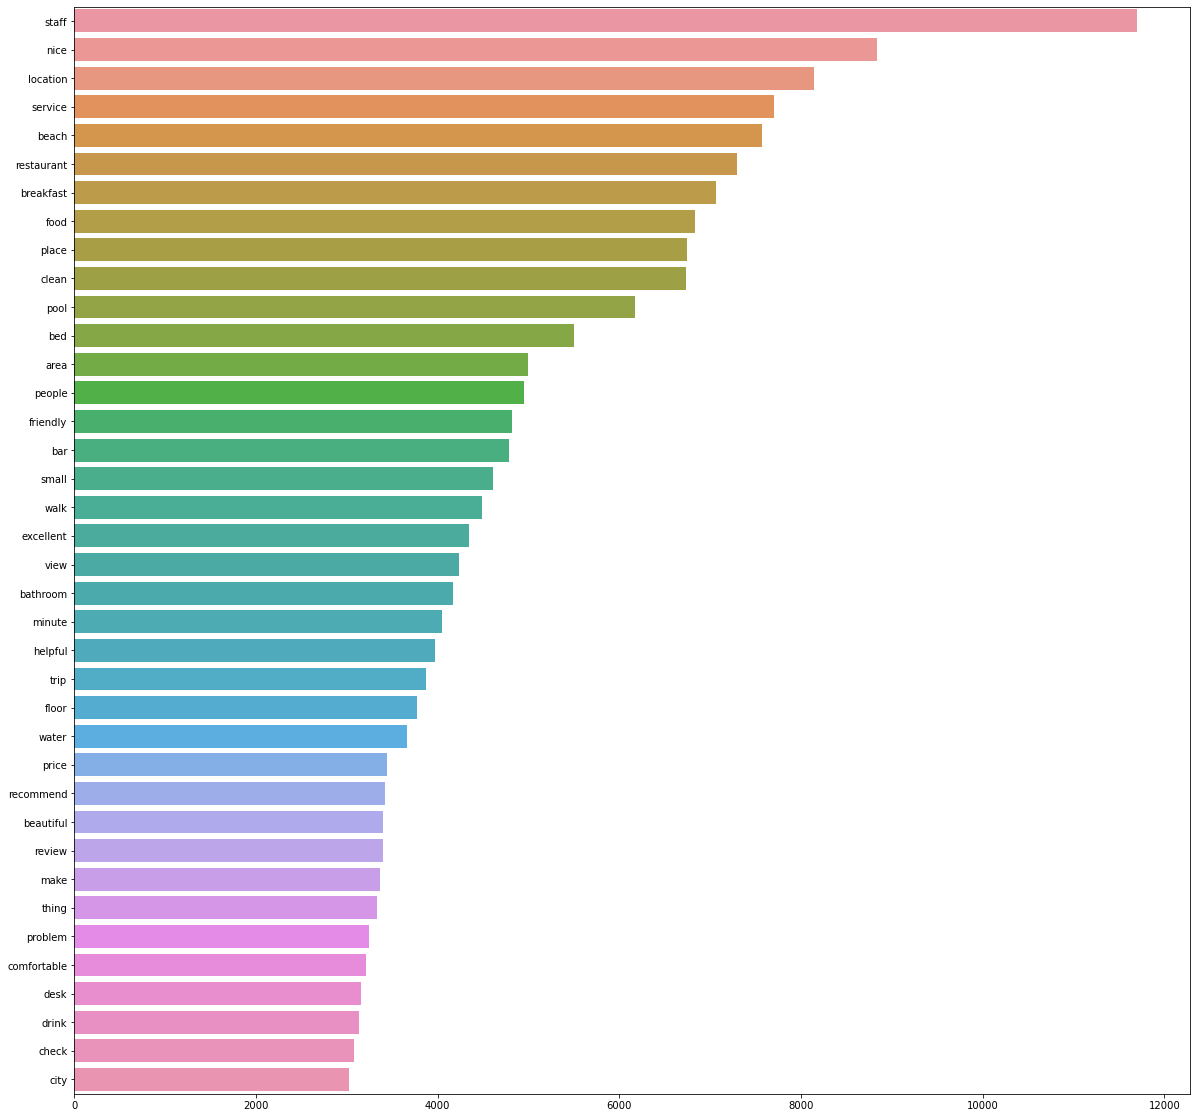

In [23]:
#visualize the the word frequency using seaborn
plt.figure(figsize=(20,20))        
sns.barplot(x=y,y=x)

with the help of  counter function from the collections library to count and store the occurrences of each word in a list. This is a very useful function when we deal with word-level analysis in natural language processing.

in the above visualization , we can easily identify the what kinds words used more frequently. Here words great, staff,stay,location,service etc dominate the reviews more time. so we can say most of the travellers more talking about these kinds things

In [31]:
#create a data frame for words and word length
X=pd.DataFrame(x)
Y=pd.DataFrame(y)
data_1=pd.concat([X,Y],axis=1)

data_1.columns=["Word","Length"]
data_1

,Word,Length
0,staff,11700
1,nice,8837
2,location,8139
3,service,7697
4,beach,7565
5,restaurant,7294
6,breakfast,7063
7,food,6835
8,place,6744
9,clean,6736


# Word frequency of positive reviews based on Rating

In [32]:

#First create list for reviews
text_list=[]
for index, row in train_data.iterrows(): 
    text_list.append((row['Review'])) 
text_list

['exceptional service nice daughter priced king suite weekend night impressed exceptionally welcoming service reservation departure employee talked friendly eager question amazed age shaped pool tiny looked fun kid hot tub exercise breakfast abundant make waffle add scrambled egg bacon sausage fruit bagel muffin oatmeal yogurt wanted morning sort long line waiting make waffle waiting scrambled egg nice asked freeway reading review earlier bit noisy hey city felt deluxe reasonable price nice bedding art wall space needle bit window shuttle run hourly reserve place worked shuttle missed minute needed return space needle promptly paid cab fare asked downtown seattle',
 'beautiful relaxing jw marriott desert ridge outstanding accommodation business pleasure husband business conference march april enjoyed tremendously half hour drive airport beautiful impressive marble entry fountain balcony overlooked pool lazy river golf palm tree restaurant excellent service delicious food enjoyed merita

In [33]:
#Extract the words from the list
total_words=''.join(text_list)
total_words=word_tokenize(total_words)

In [34]:
#Create the frequency of each word 
words_Frequency=FreqDist(total_words)

In [35]:
# display the most common 20 words
print(words_Frequency.most_common(20))

[('staff', 11541), ('room', 8663), ('nice', 8131), ('beach', 7485), ('service', 7484), ('restaurant', 7248), ('location', 7150), ('breakfast', 6985), ('food', 6779), ('clean', 6620), ('place', 6197), ('pool', 6144), ('bed', 5465), ('area', 4913), ('people', 4888), ('bar', 4751), ('friendly', 4699), ('small', 4546), ('walk', 4447), ('view', 4166)]


In [36]:
#Create commonly used positive words and their frequency
#in our train_df rating 5 considered as very positive and rating 4 considered as positive
#so we  consider rating 4 and 5 as positive rated reviews

#create a list that contain positive reviews
pos_text_list=[]  
for index, row in train_data[(train_data['Rating']==4)|(train_data['Rating']==5)].iterrows(): 
    pos_text_list.append((row['Review'])) 
pos_text_list

['exceptional service nice daughter priced king suite weekend night impressed exceptionally welcoming service reservation departure employee talked friendly eager question amazed age shaped pool tiny looked fun kid hot tub exercise breakfast abundant make waffle add scrambled egg bacon sausage fruit bagel muffin oatmeal yogurt wanted morning sort long line waiting make waffle waiting scrambled egg nice asked freeway reading review earlier bit noisy hey city felt deluxe reasonable price nice bedding art wall space needle bit window shuttle run hourly reserve place worked shuttle missed minute needed return space needle promptly paid cab fare asked downtown seattle',
 'beautiful relaxing jw marriott desert ridge outstanding accommodation business pleasure husband business conference march april enjoyed tremendously half hour drive airport beautiful impressive marble entry fountain balcony overlooked pool lazy river golf palm tree restaurant excellent service delicious food enjoyed merita

In [37]:
#extract words from positive review list
pos_total_words=' '.join(pos_text_list)
pos_total_words=word_tokenize(pos_total_words)
pos_total_words

['exceptional',
 'service',
 'nice',
 'daughter',
 'priced',
 'king',
 'suite',
 'weekend',
 'night',
 'impressed',
 'exceptionally',
 'welcoming',
 'service',
 'reservation',
 'departure',
 'employee',
 'talked',
 'friendly',
 'eager',
 'question',
 'amazed',
 'age',
 'shaped',
 'pool',
 'tiny',
 'looked',
 'fun',
 'kid',
 'hot',
 'tub',
 'exercise',
 'breakfast',
 'abundant',
 'make',
 'waffle',
 'add',
 'scrambled',
 'egg',
 'bacon',
 'sausage',
 'fruit',
 'bagel',
 'muffin',
 'oatmeal',
 'yogurt',
 'wanted',
 'morning',
 'sort',
 'long',
 'line',
 'waiting',
 'make',
 'waffle',
 'waiting',
 'scrambled',
 'egg',
 'nice',
 'asked',
 'freeway',
 'reading',
 'review',
 'earlier',
 'bit',
 'noisy',
 'hey',
 'city',
 'felt',
 'deluxe',
 'reasonable',
 'price',
 'nice',
 'bedding',
 'art',
 'wall',
 'space',
 'needle',
 'bit',
 'window',
 'shuttle',
 'run',
 'hourly',
 'reserve',
 'place',
 'worked',
 'shuttle',
 'missed',
 'minute',
 'needed',
 'return',
 'space',
 'needle',
 'promptly',

<AxesSubplot:>

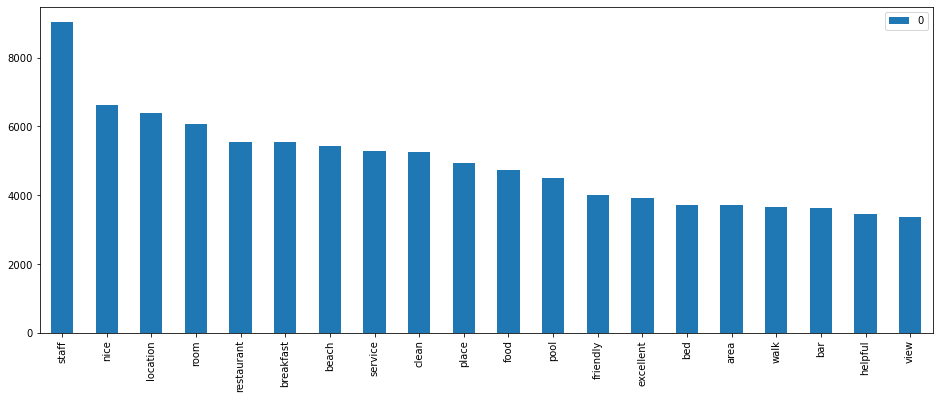

In [38]:
# visualize count the word frequency of positive reviews
pos_freq_words=FreqDist(pos_total_words)
pd.DataFrame(pos_freq_words,index=[0]).T.sort_values(by=[0],ascending=False).head(20).plot(kind='bar',figsize=(16,6))

In [39]:
#Create commonly used negative words and their frequency
#in our train_df rating 0 considered as very negative and rating 1 considered as negative
#so we  consider rating 0 and 1 as negative rated reviews

#create a list that contain negative reviews
neg_text_list=[]  
for index, row in train_data[(train_data['Rating']==1)|(train_data['Rating']==2)].iterrows(): 
    neg_text_list.append((row['Review'])) 


In [40]:
#extract words from negative review list
neg_total_words=' '.join(neg_text_list)
neg_total_words=word_tokenize(neg_total_words)

In [41]:
#count the word frequency of negative reviews
neg_freq_words=FreqDist(neg_total_words)

<AxesSubplot:>

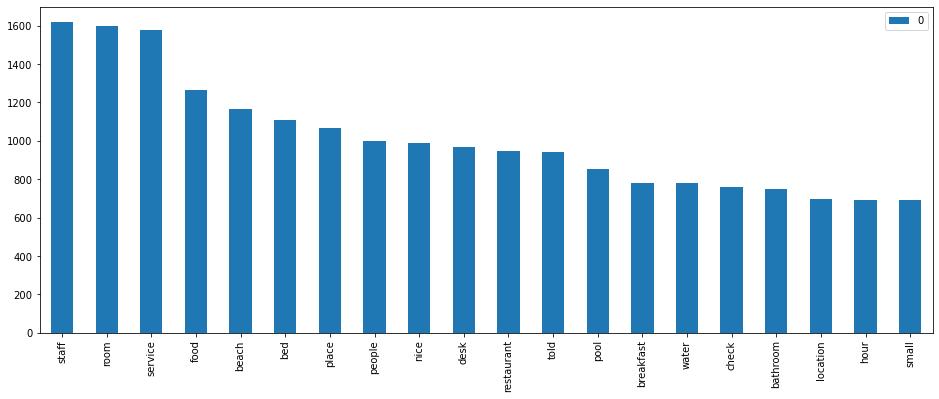

In [42]:
#plot the negative frequency words
pd.DataFrame(neg_freq_words,index=[0]).T.sort_values(by=[0],ascending=False).head(20).plot(kind='bar',figsize=(16,6))

# Ngram exploration

Ngrams are simply sequences of n words.If the number of words is two, it is called bigram. For 3 words it is called a trigram and so on.

Looking at most frequent n-grams can give you a better understanding of the context in which the word was used.

To implement n-grams we will use ngrams function from nltk.util. 

In [93]:
def plot_top_ngrams_barchart(text, n=2):
   

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:20]

    top_n_bigrams=get_top_ngram(text,n)[:20]
    x,y=map(list,zip(*top_n_bigrams))
    plt.figure(figsize=(20,10))
    sns.barplot(x=y,y=x)

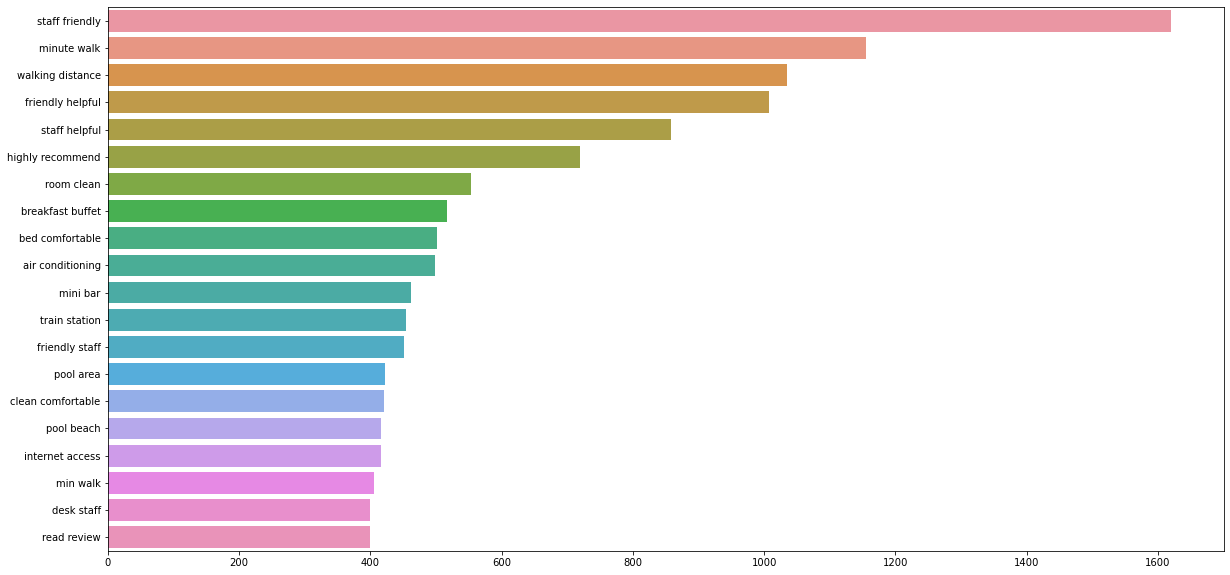

In [94]:
#visualization of bigram
plot_top_ngrams_barchart(train_data['Review'],2)

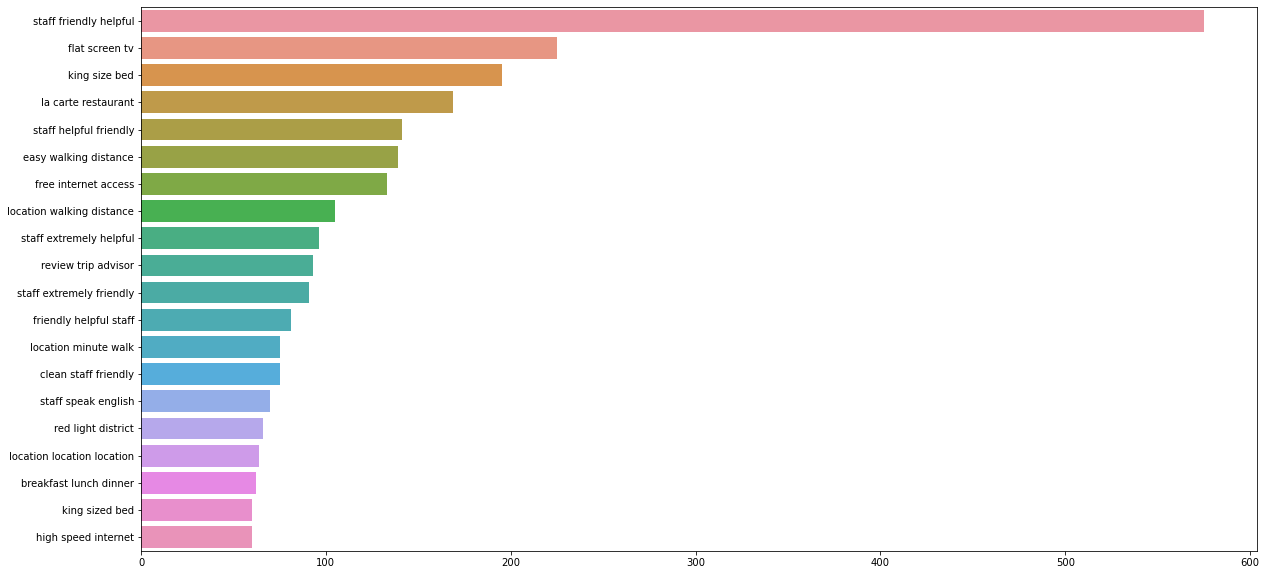

In [95]:
#visualization of trigram
plot_top_ngrams_barchart(train_data['Review'],3)

Here , we can observe that staff friendly helpful, minute walk,room clean etc that are related to hotel dominated the hotel review 

hotel managers can easily identify the things thats are travelers most interested



In [54]:
def get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:20]

In [56]:
bigram=get_top_ngram(train_data['Review'],2)

In [58]:
data_2=pd.DataFrame(bigram)
data_2

,0,1
0,staff friendly,1619
1,minute walk,1155
2,walking distance,1035
3,friendly helpful,1008
4,staff helpful,858
5,highly recommend,720
6,room clean,554
7,breakfast buffet,517
8,bed comfortable,501
9,air conditioning,499


In [59]:
#trigram
bigram=get_top_ngram(train_data['Review'],3)
data_3=pd.DataFrame(bigram)
data_3

,0,1
0,staff friendly helpful,575
1,flat screen tv,225
2,king size bed,195
3,la carte restaurant,169
4,staff helpful friendly,141
5,easy walking distance,139
6,free internet access,133
7,location walking distance,105
8,staff extremely helpful,96
9,review trip advisor,93


# Sentimental Analysis of Reviews

Sentiment Analysis
Sentiment analysis is basically the process of determining the attitude or the emotion of the writer, i.e., whether it is positive or negative or neutral.

The sentiment function of textblob returns two properties, polarity, and subjectivity.

Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1].

reference link:www.analyticsvidhya.com/blog/2018/02/natural-language-processing-for-beginners-using-textblob

In [4]:
#use data_pick.pkl for loading train_df data
train_data = pd.read_pickle('train_first_data.pkl')
train_data

,ID,Review,Rating
0,0,exceptional service nice daughter priced king ...,5
1,1,beautiful relaxing jw marriott desert ridge ou...,5
2,2,location location min subway take blommingdale...,5
3,3,pleased nice safe flower market vast array res...,3
4,4,excellent service excellent location couple mi...,4
...,...,...,...
14338,14338,madrid perfect location tiny quiet street cent...,5
14339,14339,excellent florence chosen tripadviser hidden g...,5
14340,14340,place relax vacation book trip paradisus husba...,4
14341,14341,week seattle loved minute pacific plaza buy im...,3


In [5]:
#create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#create two new columns
train_data["subjectivity"]=train_data["Review"].apply(getSubjectivity)
train_data["polarity"]=train_data["Review"].apply(getPolarity)

In [6]:
train_data.tail()

,ID,Review,Rating,subjectivity,polarity
14338,14338,madrid perfect location tiny quiet street cent...,5,0.566667,0.333333
14339,14339,excellent florence chosen tripadviser hidden g...,5,0.710417,0.403125
14340,14340,place relax vacation book trip paradisus husba...,4,0.479297,0.209258
14341,14341,week seattle loved minute pacific plaza buy im...,3,0.600000,0.433333
14342,14342,clear internet reservation friday rang hour ad...,1,0.566667,-0.100000


In [7]:
#create a function to compute the positive neutral and negative analysis

def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'

In [8]:
train_data["Review_Type"]=train_data["polarity"].apply(getAnalysis)
train_data

,ID,Review,Rating,subjectivity,polarity,Review_Type
0,0,exceptional service nice daughter priced king ...,5,0.760000,0.427222,Positive
1,1,beautiful relaxing jw marriott desert ridge ou...,5,0.837870,0.564907,Positive
2,2,location location min subway take blommingdale...,5,0.513333,0.273333,Positive
3,3,pleased nice safe flower market vast array res...,3,0.613636,0.196970,Positive
4,4,excellent service excellent location couple mi...,4,0.766667,0.654167,Positive
...,...,...,...,...,...,...
14338,14338,madrid perfect location tiny quiet street cent...,5,0.566667,0.333333,Positive
14339,14339,excellent florence chosen tripadviser hidden g...,5,0.710417,0.403125,Positive
14340,14340,place relax vacation book trip paradisus husba...,4,0.479297,0.209258,Positive
14341,14341,week seattle loved minute pacific plaza buy im...,3,0.600000,0.433333,Positive


In [60]:
train_second_data=train_data

In [61]:
#create pickle file
train_second_data.to_pickle('train_second_data.pkl')

In [62]:
train_second_data=pd.read_pickle('train_second_data.pkl')
train_second_data

,ID,Review,Rating,subjectivity,polarity,Review_Type
0,0,exceptional service nice daughter priced king ...,5,0.760000,0.427222,Positive
1,1,beautiful relaxing jw marriott desert ridge ou...,5,0.837870,0.564907,Positive
2,2,location location min subway take blommingdale...,5,0.513333,0.273333,Positive
3,3,pleased nice safe flower market vast array res...,3,0.613636,0.196970,Positive
4,4,excellent service excellent location couple mi...,4,0.766667,0.654167,Positive
...,...,...,...,...,...,...
14338,14338,madrid perfect location tiny quiet street cent...,5,0.566667,0.333333,Positive
14339,14339,excellent florence chosen tripadviser hidden g...,5,0.710417,0.403125,Positive
14340,14340,place relax vacation book trip paradisus husba...,4,0.479297,0.209258,Positive
14341,14341,week seattle loved minute pacific plaza buy im...,3,0.600000,0.433333,Positive


In [43]:
train_data["Review_Type"].value_counts()

Positive    12690
Negative     1600
Name: Review_Type, dtype: int64

# Univariate analysis

Univariate analysis means one variable analysis.'Uni' means 'one' and 'variate' means'variable'. Univariate analysis is to analyse one variable or one features Univariate basically tells us how data in each feature is distributed and also tells us about central tendencies like mean, median, and mode.

To do univariate data analysis we use following ploting mechanisms:

Histograms

Here with the help of polarity distrute the reviews

C:\Users\sathi\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\sathi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sathi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sathi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot`

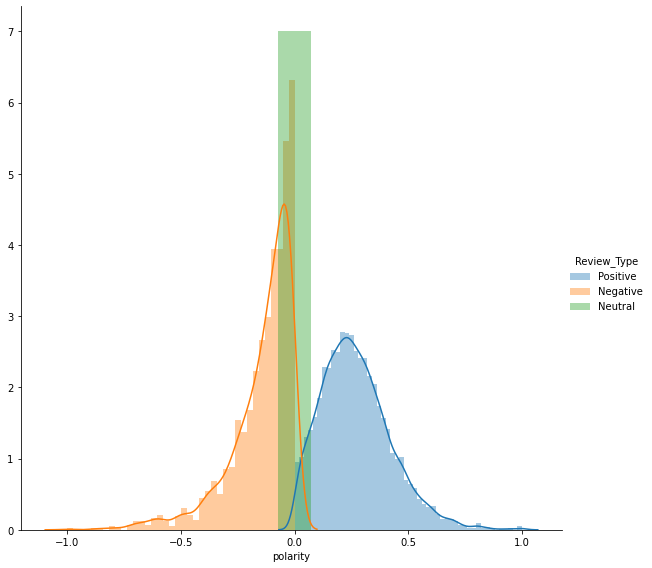

In [107]:
#visualization  of polarity based on Review_Type
g = sns.FacetGrid(train_data, hue = "Review_Type",size=8)
g.map(sns.distplot, "polarity")
g.add_legend()
plt.show()

here we can see that the distibution of reviews based on polarity

most of the positive reviews are distributed in the range between 0 to 0.5 polarity score

most negative reviews are distributed in the range of -0.5 to 0 polarity score

less distribution of neutral review 

Text(0.5, 0.98, 'Characters in review')

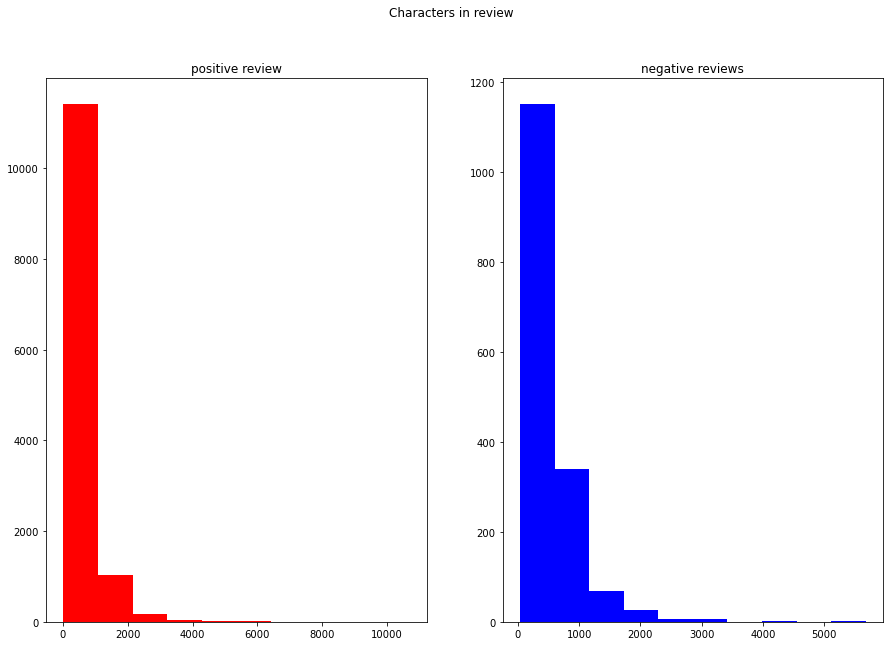

In [108]:
#using histogram to visualize postive and negative reviews

review_pos_len=train_data[train_data["Review_Type"]=="Positive"]['Review'].str.len()
review_neg_len=train_data[train_data["Review_Type"]=="Negative"]["Review"].str.len()

fig,(d1,d2)=plt.subplots(1,2,figsize=(15,10))

d1.hist(review_pos_len,color='red')
d1.set_title("positive review")

d2.hist(review_neg_len,color='blue')
d2.set_title("negative reviews")
fig.suptitle("Characters in review")

in both positive and negative reviews words length are positive skewed, all the reviews length in the range  of 1000

# Bivariate Analysis- using Scatter plot

In [109]:
#Scatter plot representation all types of reviews

C:\Users\sathi\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


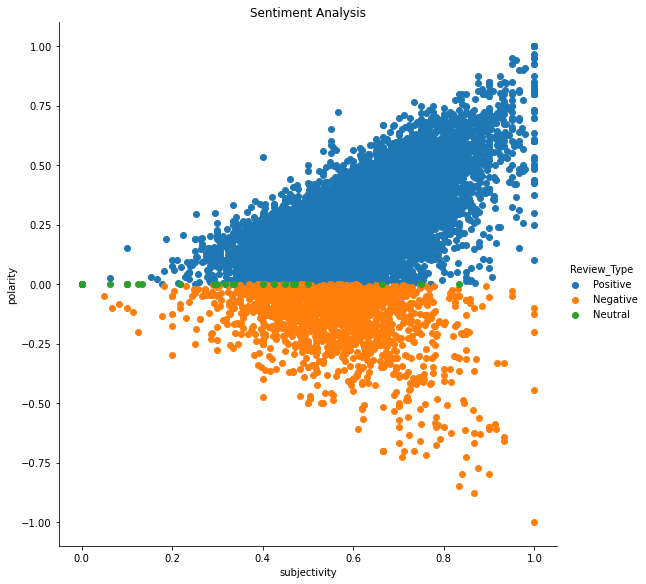

In [110]:
g = sns.FacetGrid(train_data,hue="Review_Type", size=8)
g.map(plt.scatter, "subjectivity", "polarity")
plt.title("Sentiment Analysis")
g.add_legend()
plt.show()

In [111]:
#visualize the percentage of types of reviews using pie graph
target_count = train_data['Review_Type'].value_counts()
target_count

Positive    12690
Negative     1600
Neutral        53
Name: Review_Type, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

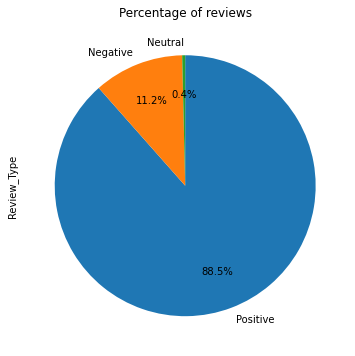

In [112]:
labels = ['Positive','Negative','Neutral']
target_count.plot(kind='pie',labels=labels,counterclock=False,startangle=90,autopct='%1.1f%%',pctdistance=0.7,figsize=(12,6))
plt.title("Percentage of reviews")
plt.show

After sentimen aalysis, we can see that 88.5% of reviews are positive,

11.2%reviews are negative

0.4% reviews are neutral

While training the model, we find lot of positivity as compare to the negativity in reviews. 

This imbalanced dataset issue does not making correct predictions. 

so to solve this issue we would perform sampling technique such as over sampling or under sampling

# Word cloud representation of all reviews

Wordcloud is a great way to represent text data. The size and color of each word that appears in the wordcloud indicate it’s frequency or importance.

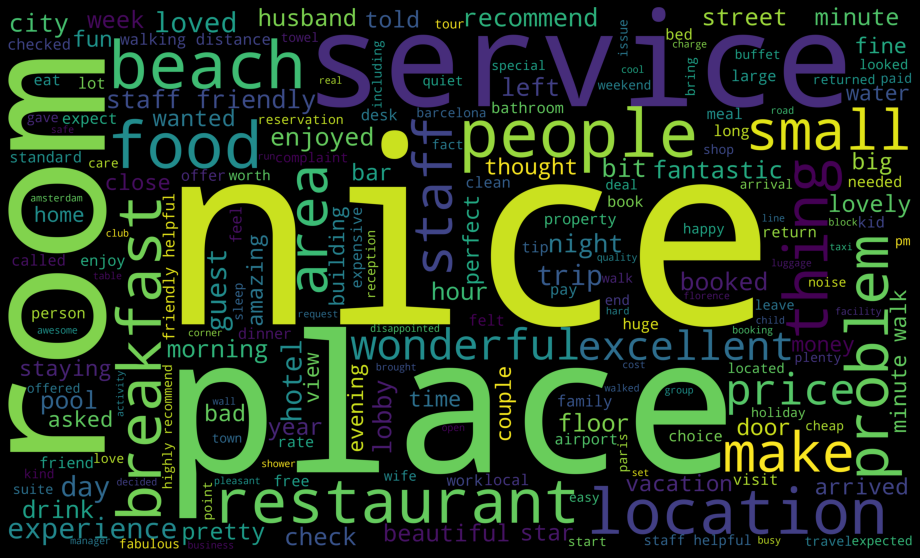

In [113]:

import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud=WordCloud(width=5000,height=3000,background_color='black',max_words=200).generate(" ".join(train_data.Review))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Most of the words are related to the hotels: room, staff, breakfast,restaurant etc. Some words are more related to the customer experience with the hotel stay:  wondeful, beautiful, nice, small,excellent,quality etc.

In [64]:
#word cloud representation of positive review and negative reviers
positive_reviews=train_data[train_data["Review_Type"]=="Positive"]
Negative_reviews=train_data[train_data["Review_Type"]=="Negative"]

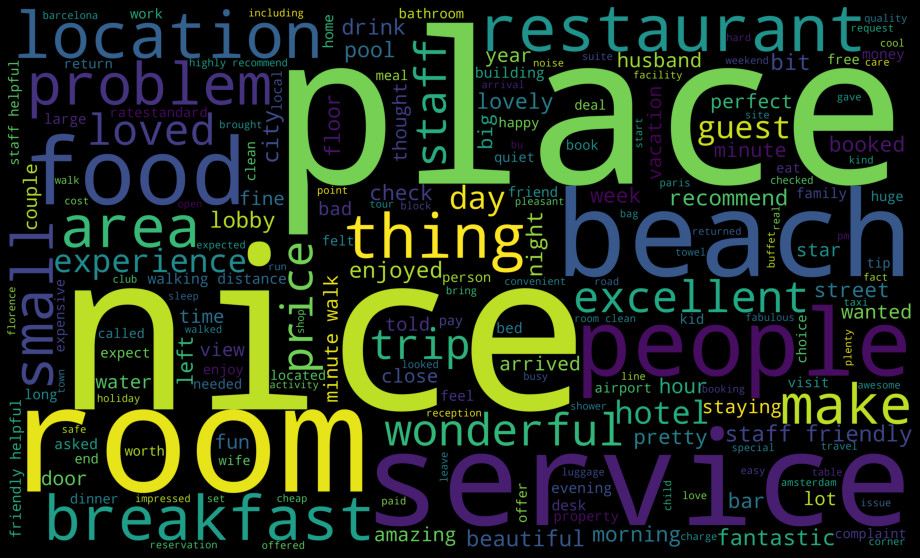

In [115]:
#word cloud representation of positive review 
wordcloud=WordCloud(width=5000,height=3000,background_color='black',max_words=200).generate(" ".join(positive_reviews.Review))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

The most positive reviews  correspond to some good feedbacks. Here the customers in positive reviews related to hotel are  place, service, people, food restaurant,staff,breakfast etc, 

Some words are more related to the customer experience with the hotel stay: wondeful, beautiful, nice, loved,excellent,quality etc.

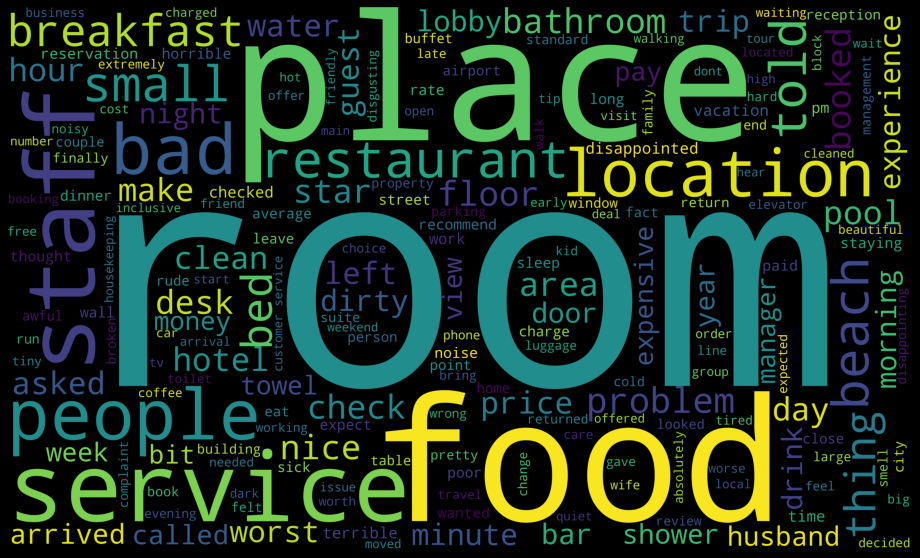

In [65]:
#word cloud representation of Negative reviews 
wordcloud=WordCloud(width=5000,height=3000,background_color='black',max_words=200).generate(" ".join(Negative_reviews.Review))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

The most negative reviews correspond to some bad feedback feedbacks. Here the customers in negative reviews related to hotel more complained about place, room,breakfast,staff,noise etc

Some words are more related to the customer experience with the hotel stay: wondeful, beautiful, nice, loved,excellent,quality etc.

conclusion:

in word cloud representation we can see that  most of the customers talking about place,room,sevice,breakfast,beach,staff,reataurant,pool,vaction,walking distance

very few customers talking about price

in my conclusion except price the travellers would consider the place,room,sevice,breakfast,beach,staff,reataurant,pool,vaction,walking distance

so the hotel manager would consider these elements, which helpfull  more in forming a positive review or improves hotel brand image.
    